# Get the data

Get the data processed in the previous notebook (Exploratory Data Analysis)

In [1]:
import pandas as pd

In [2]:
X_TRAIN_PATH: str = "data/processed/x_train.csv"
X_TEST_PATH: str = "data/processed/x_test.csv"

Y_TRAIN_PATH: str = "data/processed/y_train.csv"
Y_TEST_PATH: str = "data/processed/y_test.csv"

# save the processed data to their corresponding files
X_train = pd.read_csv(filepath_or_buffer=X_TRAIN_PATH, sep=',')
X_test = pd.read_csv(filepath_or_buffer=X_TEST_PATH, sep=',')

y_train = pd.read_csv(filepath_or_buffer=Y_TRAIN_PATH, sep=',')
y_test = pd.read_csv(filepath_or_buffer=Y_TEST_PATH, sep=',')

In [3]:
# verify x_train
X_train.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,26,1,256263,0,3,6,0,0,1,0,0,25,0
1,24,1,170277,0,3,4,0,0,0,0,0,35,0
2,36,1,75826,6,1,5,1,0,0,0,0,40,0
3,22,2,24395,1,4,5,5,0,0,0,0,20,0
4,31,6,356689,6,4,3,4,0,1,0,0,40,0


In [4]:
# verify x_test
X_test.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,29,1,280618,1,4,8,4,0,1,0,0,40,0
1,19,1,439779,1,3,9,2,0,1,0,0,15,0
2,28,1,204734,1,4,11,5,0,0,0,0,40,0
3,35,1,107991,8,3,9,0,0,1,0,0,45,0
4,20,1,54152,1,3,5,2,0,0,0,0,30,1


In [5]:
# verify y_train
y_train.head()

,income
0,0
1,0
2,0
3,0
4,0


In [6]:
# verify y_test
y_test.head()

,income
0,0
1,0
2,0
3,0
4,0


# Option 1. Default model

## Step 1: Initialization and training of the model

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [8]:
print(f"Hyperparameters of the default model: {model.get_params()}")

Hyperparameters of the default model: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


## Step 2: Model prediction

In [9]:
# make the prediction
y_pred = model.predict(X_test)


In [10]:
# make the prediction of the probabilities of being one class or another
y_prob = model.predict_proba(X_test)

## Step 3: Metrics

Let's print the full report of the model

In [11]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                            classification_report)

default_model_accuracy = accuracy_score(y_test, y_pred)
default_model_precision = precision_score(y_test, y_pred)
default_model_recall = recall_score(y_test, y_pred)
default_model_f1 = f1_score(y_test, y_pred)
default_model_auc_roc = roc_auc_score(y_test, y_prob[:, 1])
default_model_report = classification_report(y_test, y_pred)

print(f'Accuracy: {default_model_accuracy}')
print(f'Precision: {default_model_precision}')
print(f'Recall: {default_model_recall}')
print(f'F1-Score: {default_model_f1}')
print(f'AUC-ROC: {default_model_auc_roc}')
print(f'Classification Report:\n{default_model_report}')

Accuracy: 0.8728696453247351
Precision: 0.775875486381323
Recall: 0.6486662329212752
F1-Score: 0.7065910701630049
AUC-ROC: 0.9263920951994425
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4976
           1       0.78      0.65      0.71      1537

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



Now let's draw the confusion matrix

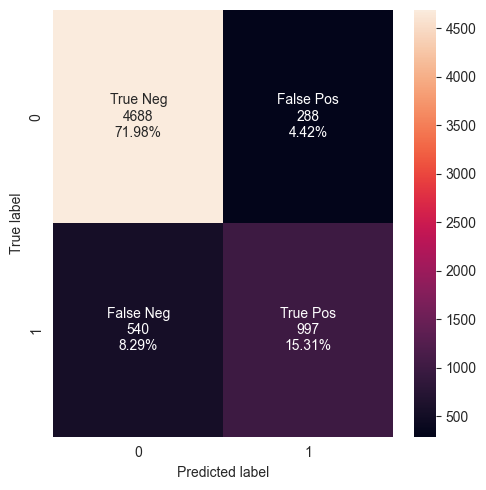

In [12]:
from src.draw_utils import draw_confusion_matrix

default_model_confusion = confusion_matrix(y_test, y_pred)

draw_confusion_matrix(confusion=default_model_confusion)

The interpretation of a confusion matrix is as follows:

- **True positive (TP)**: corresponds to the number 40 and are the cases where the model predicted positive **(the person has diabetes)** and the actual class is also positive.
- **True negative (TN)**: Corresponds to the number 75 and are the cases where the model predicted negative **(the person does not have diabetes)** and the actual class is also negative.
- **False positive (FP)**: Corresponds to the number 24 and are the cases in which the model predicted positive, but the actual class is negative.
- **False negative (FN)**: Corresponds to the number 15 and are the cases where the model predicted negative, but the actual class is positive.

# Option 2. Model with optimization

In [13]:
# create another model
opt_model = XGBClassifier()

## Step 1: Create the hyperparameter optimization model

In [14]:
from sklearn.model_selection import GridSearchCV

# define the parameters that we want to adjust by hand, depends on the model to use
hyperparams = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# initialize the grid
grid = GridSearchCV(opt_model, hyperparams, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

## Step 2: Fit the model

In [15]:
grid.fit(X_train, y_train.values)

print(f"Best hyperparameters: {grid.best_params_}")

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best hyperparameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.9}


## Step 3: Get the best model and predict

In [16]:
# get the best parameters and model
best_params = grid.best_params_
best_model: XGBClassifier = grid.best_estimator_

In [17]:
# predict the values
y_pred = best_model.predict(X_test)

In [18]:
# make the prediction of the probabilities of being one class or another
y_prob = best_model.predict_proba(X_test)

## Step 4: Metrics of the model

In [19]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             log_loss, classification_report)

optimized_model_accuracy = accuracy_score(y_test, y_pred)
optimized_model_precision = precision_score(y_test, y_pred)
optimized_model_recall = recall_score(y_test, y_pred)
optimized_model_f1 = f1_score(y_test, y_pred)
optimized_model_auc_roc = roc_auc_score(y_test, y_prob[:, 1])
optimized_model_report = classification_report(y_test, y_pred)

print(f'Accuracy: {optimized_model_accuracy}')
print(f'Precision: {optimized_model_precision}')
print(f'Recall: {optimized_model_recall}')
print(f'F1-Score: {optimized_model_f1}')
print(f'AUC-ROC: {optimized_model_auc_roc}')
print(f'Classification Report:\n{optimized_model_report}')

Accuracy: 0.8745585751573776
Precision: 0.7995008319467554
Recall: 0.6252439817826936
F1-Score: 0.701715954728003
AUC-ROC: 0.9277191547404118
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4976
           1       0.80      0.63      0.70      1537

    accuracy                           0.87      6513
   macro avg       0.85      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



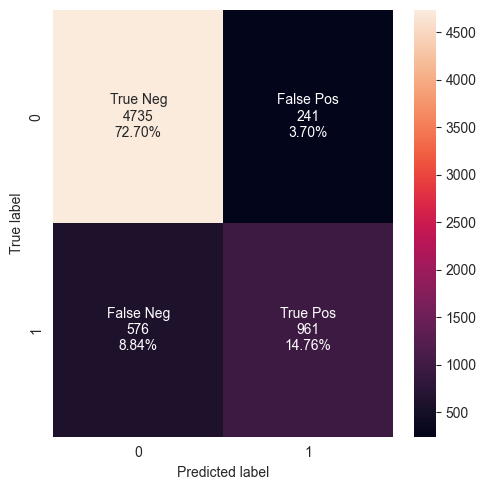

In [20]:
optimized_model_confusion = confusion_matrix(y_test, y_pred)

draw_confusion_matrix(confusion=optimized_model_confusion)

The interpretation of a confusion matrix is as follows:

- **True positive (TP)**: corresponds to the number 42 and are the cases where the model predicted positive **(the person has diabetes)** and the actual class is also positive.
- **True negative (TN)**: Corresponds to the number 72 and are the cases where the model predicted negative **(the person does not have diabetes)** and the actual class is also negative.
- **False positive (FP)**: Corresponds to the number 27 and are the cases in which the model predicted positive, but the actual class is negative.
- **False negative (FN)**: Corresponds to the number 13 and are the cases where the model predicted negative, but the actual class is positive.

# Conclusion

In [ ]:

from src.markdown_utils import show_comparison_table

# set the metrics to use
metrics: list[str] = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# get the metrics of the default and optimized list values
default_model_metrics: list[float] = [default_model_accuracy, default_model_precision, default_model_recall,
                                      default_model_f1, default_model_auc_roc]
optimized_model_metrics: list[float] = [optimized_model_accuracy, optimized_model_precision, optimized_model_recall,
                                        optimized_model_f1, optimized_model_auc_roc]

# construct the Markdown table
show_comparison_table(
    metric_names=metrics,
    first_metrics=optimized_model_metrics,
    second_metrics=optimized_model_metrics,
    first_column_name='Default Model',
    second_column_name='Optimized Model'
)

In [ ]:
from src.draw_utils import draw_comparison_confusion_matrices

draw_comparison_confusion_matrices(
    confusion_1=default_model_confusion,
    confusion_2=optimized_model_confusion,
    confusion_matrix_1_name='Default model',
    confusion_matrix_2_name='Optimized model'
)

WE can see that the default model and the optimized one are really close, the metrics are not too different, one model has a better performance with the negative label 0 (do not have diabetes) and other model have better results with the positive label 1 (have diabetes).

The default model has a better performance with the label 1, it has better accuracy and precision. While the optimized model has a better performance with the label 0 and these results are backed up by the metrics, because the optimized model has better recall, f1-score and AUC-ROC.